In [25]:
!pip install netCDF4 numpy
import netCDF4 as nc
import numpy as np
from scipy.ndimage import shift

# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)

# Read NetCDF file for T2 first fine model data
T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_aug = T2_20[168:888, :, :]-273.15; del T2_20;
print(T2_20_aug.shape)

T2_20_aug_local = shift(T2_20_aug, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(T2_20_aug_local.shape)
T2_20_aug_local_diurnal = np.reshape(T2_20_aug_local, (24, 30, 171, 162)); del T2_20_aug_local;
print(T2_20_aug_local_diurnal.shape)

T2_20_diurnal_aug_day_fine = np.nanmean(T2_20_aug_local_diurnal[7:19, :, :, :], axis=0);
T2_20_diurnal_aug_day_mn_fine = np.nanmean(T2_20_diurnal_aug_day_fine, axis=0); del T2_20_diurnal_aug_day_fine;
T2_20_diurnal_aug_night_fine = np.nanmean(T2_20_aug_local_diurnal[np.r_[0:6, 20:22], :, :, :], axis=0); del T2_20_aug_local_diurnal;
T2_20_diurnal_aug_night_mn_fine = np.nanmean(T2_20_diurnal_aug_night_fine, axis=0); del T2_20_diurnal_aug_night_fine;
print(T2_20_diurnal_aug_day_mn_fine.shape)
print(T2_20_diurnal_aug_night_mn_fine.shape)

T2_20_diurnal_aug_diff = T2_20_diurnal_aug_day_mn_fine-T2_20_diurnal_aug_night_mn_fine;

(171, 162)
(171, 162)
(889, 171, 162)
(720, 171, 162)
(720, 171, 162)
(24, 30, 171, 162)
(171, 162)
(171, 162)


In [27]:
u_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
u_20 = u_dataset['u10'][:]; del u_dataset;
print(u_20.shape)
u_20_aug = u_20[168:888, :, :]; del u_20;
print(u_20_aug.shape)
u_20_diurnal_aug_local = shift(u_20_aug, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
u_20_diurnal_aug = np.reshape(u_20_diurnal_aug_local, (24, 30, 171, 162));
u_20_diurnal_aug_day = np.nanmean(u_20_diurnal_aug[7:19, :, :, :], axis=0);
u_20_diurnal_aug_day_mn_fine = np.nanmean(u_20_diurnal_aug_day, axis=0); del u_20_diurnal_aug_day;
u_20_diurnal_aug_night = np.nanmean(u_20_diurnal_aug[np.r_[0:6, 20:22], :, :, :], axis=0); del u_20_diurnal_aug;
u_20_diurnal_aug_night_mn_fine = np.nanmean(u_20_diurnal_aug_night, axis=0); del u_20_diurnal_aug_night;


v_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
v_20 = v_dataset['v10'][:]; del v_dataset;
print(v_20.shape)
v_20_aug = v_20[168:888, :, :]; del v_20;
print(v_20_aug.shape)
v_20_diurnal_aug_local = shift(v_20_aug, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
v_20_diurnal_aug = np.reshape(v_20_diurnal_aug_local, (24, 30, 171, 162));
v_20_diurnal_aug_day = np.nanmean(v_20_diurnal_aug[7:19, :, :, :], axis=0);
v_20_diurnal_aug_day_mn_fine = np.nanmean(v_20_diurnal_aug_day, axis=0); del v_20_diurnal_aug_day;
v_20_diurnal_aug_night = np.nanmean(v_20_diurnal_aug[np.r_[0:6, 20:22], :, :, :], axis=0); del v_20_diurnal_aug;
v_20_diurnal_aug_night_mn_fine = np.nanmean(v_20_diurnal_aug_night, axis=0); del v_20_diurnal_aug_night;

ws_diurnal_aug_day_mn_fine = np.sqrt(u_20_diurnal_aug_day_mn_fine**2+v_20_diurnal_aug_day_mn_fine**2);
ws_diurnal_aug_night_mn_fine = np.sqrt(u_20_diurnal_aug_night_mn_fine**2+v_20_diurnal_aug_night_mn_fine**2);
ws_diurnal_aug_diff = ws_diurnal_aug_day_mn_fine-ws_diurnal_aug_night_mn_fine;

(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)


In [4]:
!pip install cartopy
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import MultipleLocator

# Load the county and lake shapefiles
counties = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
salton = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/Salton_geog/Salton_geog.shp")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 48.3 MB/s eta 0:00:00


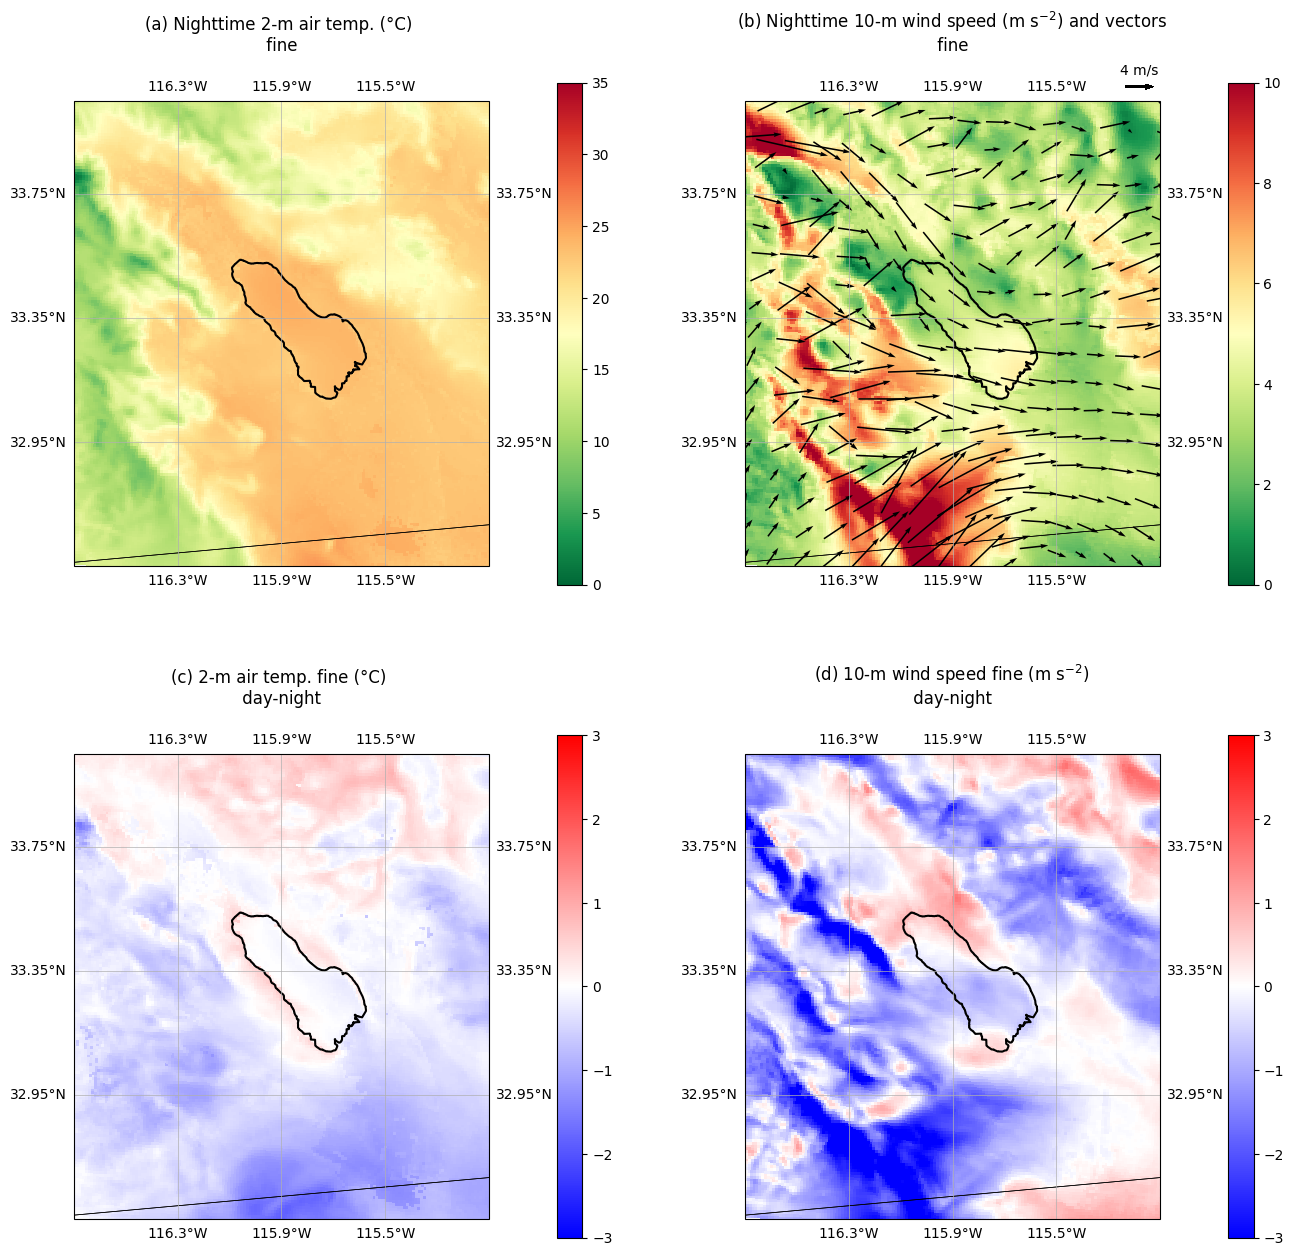

In [41]:
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize=(16, 15), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
plt.subplots_adjust(wspace=0.18, hspace=0.3)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, T2_20_diurnal_aug_night_mn_fine, cmap='RdYlGn_r', vmin=0, vmax=35)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='none')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) Nighttime 2-m air temp. (\u00b0C) \n fine \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=1, pad=0.12)

# Second subplot
ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, ws_diurnal_aug_night_mn_fine, cmap='RdYlGn_r', vmin=0, vmax=10)
skip = (slice(None, None, 10), slice(None, None, 10)) # start, stop, step
quiver_plot = ax_2.quiver(lon[skip], lat[skip], u_20_diurnal_aug_night_mn_fine[skip], v_20_diurnal_aug_night_mn_fine[skip], units='xy', angles='xy', color='black', scale=40)
quiver_plot_key = plt.quiverkey(quiver_plot, 0.95, 1.03, 4, '4 m/s')
#quiver_plot.set_linewidths(10)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='none')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) Nighttime 10-m wind speed (m s$^{-2}$) and vectors \n fine \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=1, pad=0.12)

# Third subplot
ax_3.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_3 = ax_3.pcolormesh(lon, lat, T2_20_diurnal_aug_diff, cmap='bwr', vmin=-3, vmax=3)
counties.plot(ax=ax_3, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_3, linewidth=1.5, color='black', facecolor='none')
ax_3.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_3.set_title('(c) 2-m air temp. fine (\u00b0C) \n day-night \n');
cbar_3 = plt.colorbar(mesh_3, ax=ax_3, shrink=1, pad=0.12)


# Fourth subplot
ax_4.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_4 = ax_4.pcolormesh(lon, lat, ws_diurnal_aug_diff, cmap='bwr', vmin=-3, vmax=3)
counties.plot(ax=ax_4, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_4, linewidth=1.5, color='black', facecolor='none')
ax_4.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_4.set_title('(d) 10-m wind speed fine (m s$^{-2}$) \n day-night \n');
cbar_4 = plt.colorbar(mesh_4, ax=ax_4, shrink=1, pad=0.12)

plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_t2_day_night_fine_diff.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()